In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.shape

(4340, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
print(df.fuel.unique())
print(df.seller_type.unique())
print(df.transmission.unique())
print(df.owner.unique())


['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
df=df.drop('name',axis=1)

In [10]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
df['no_year']=2020-df['year']

In [12]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,13
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,13
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,8
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,3
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [13]:
df=df.drop('year',axis=1)

In [14]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Diesel,Individual,Manual,Second Owner,6


In [15]:
df=pd.get_dummies(df,drop_first=True)

In [16]:
df.columns

Index(['selling_price', 'km_driven', 'no_year', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [17]:
df.head()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [18]:
df.shape

(4340, 14)

In [19]:
df.corr()

,selling_price,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


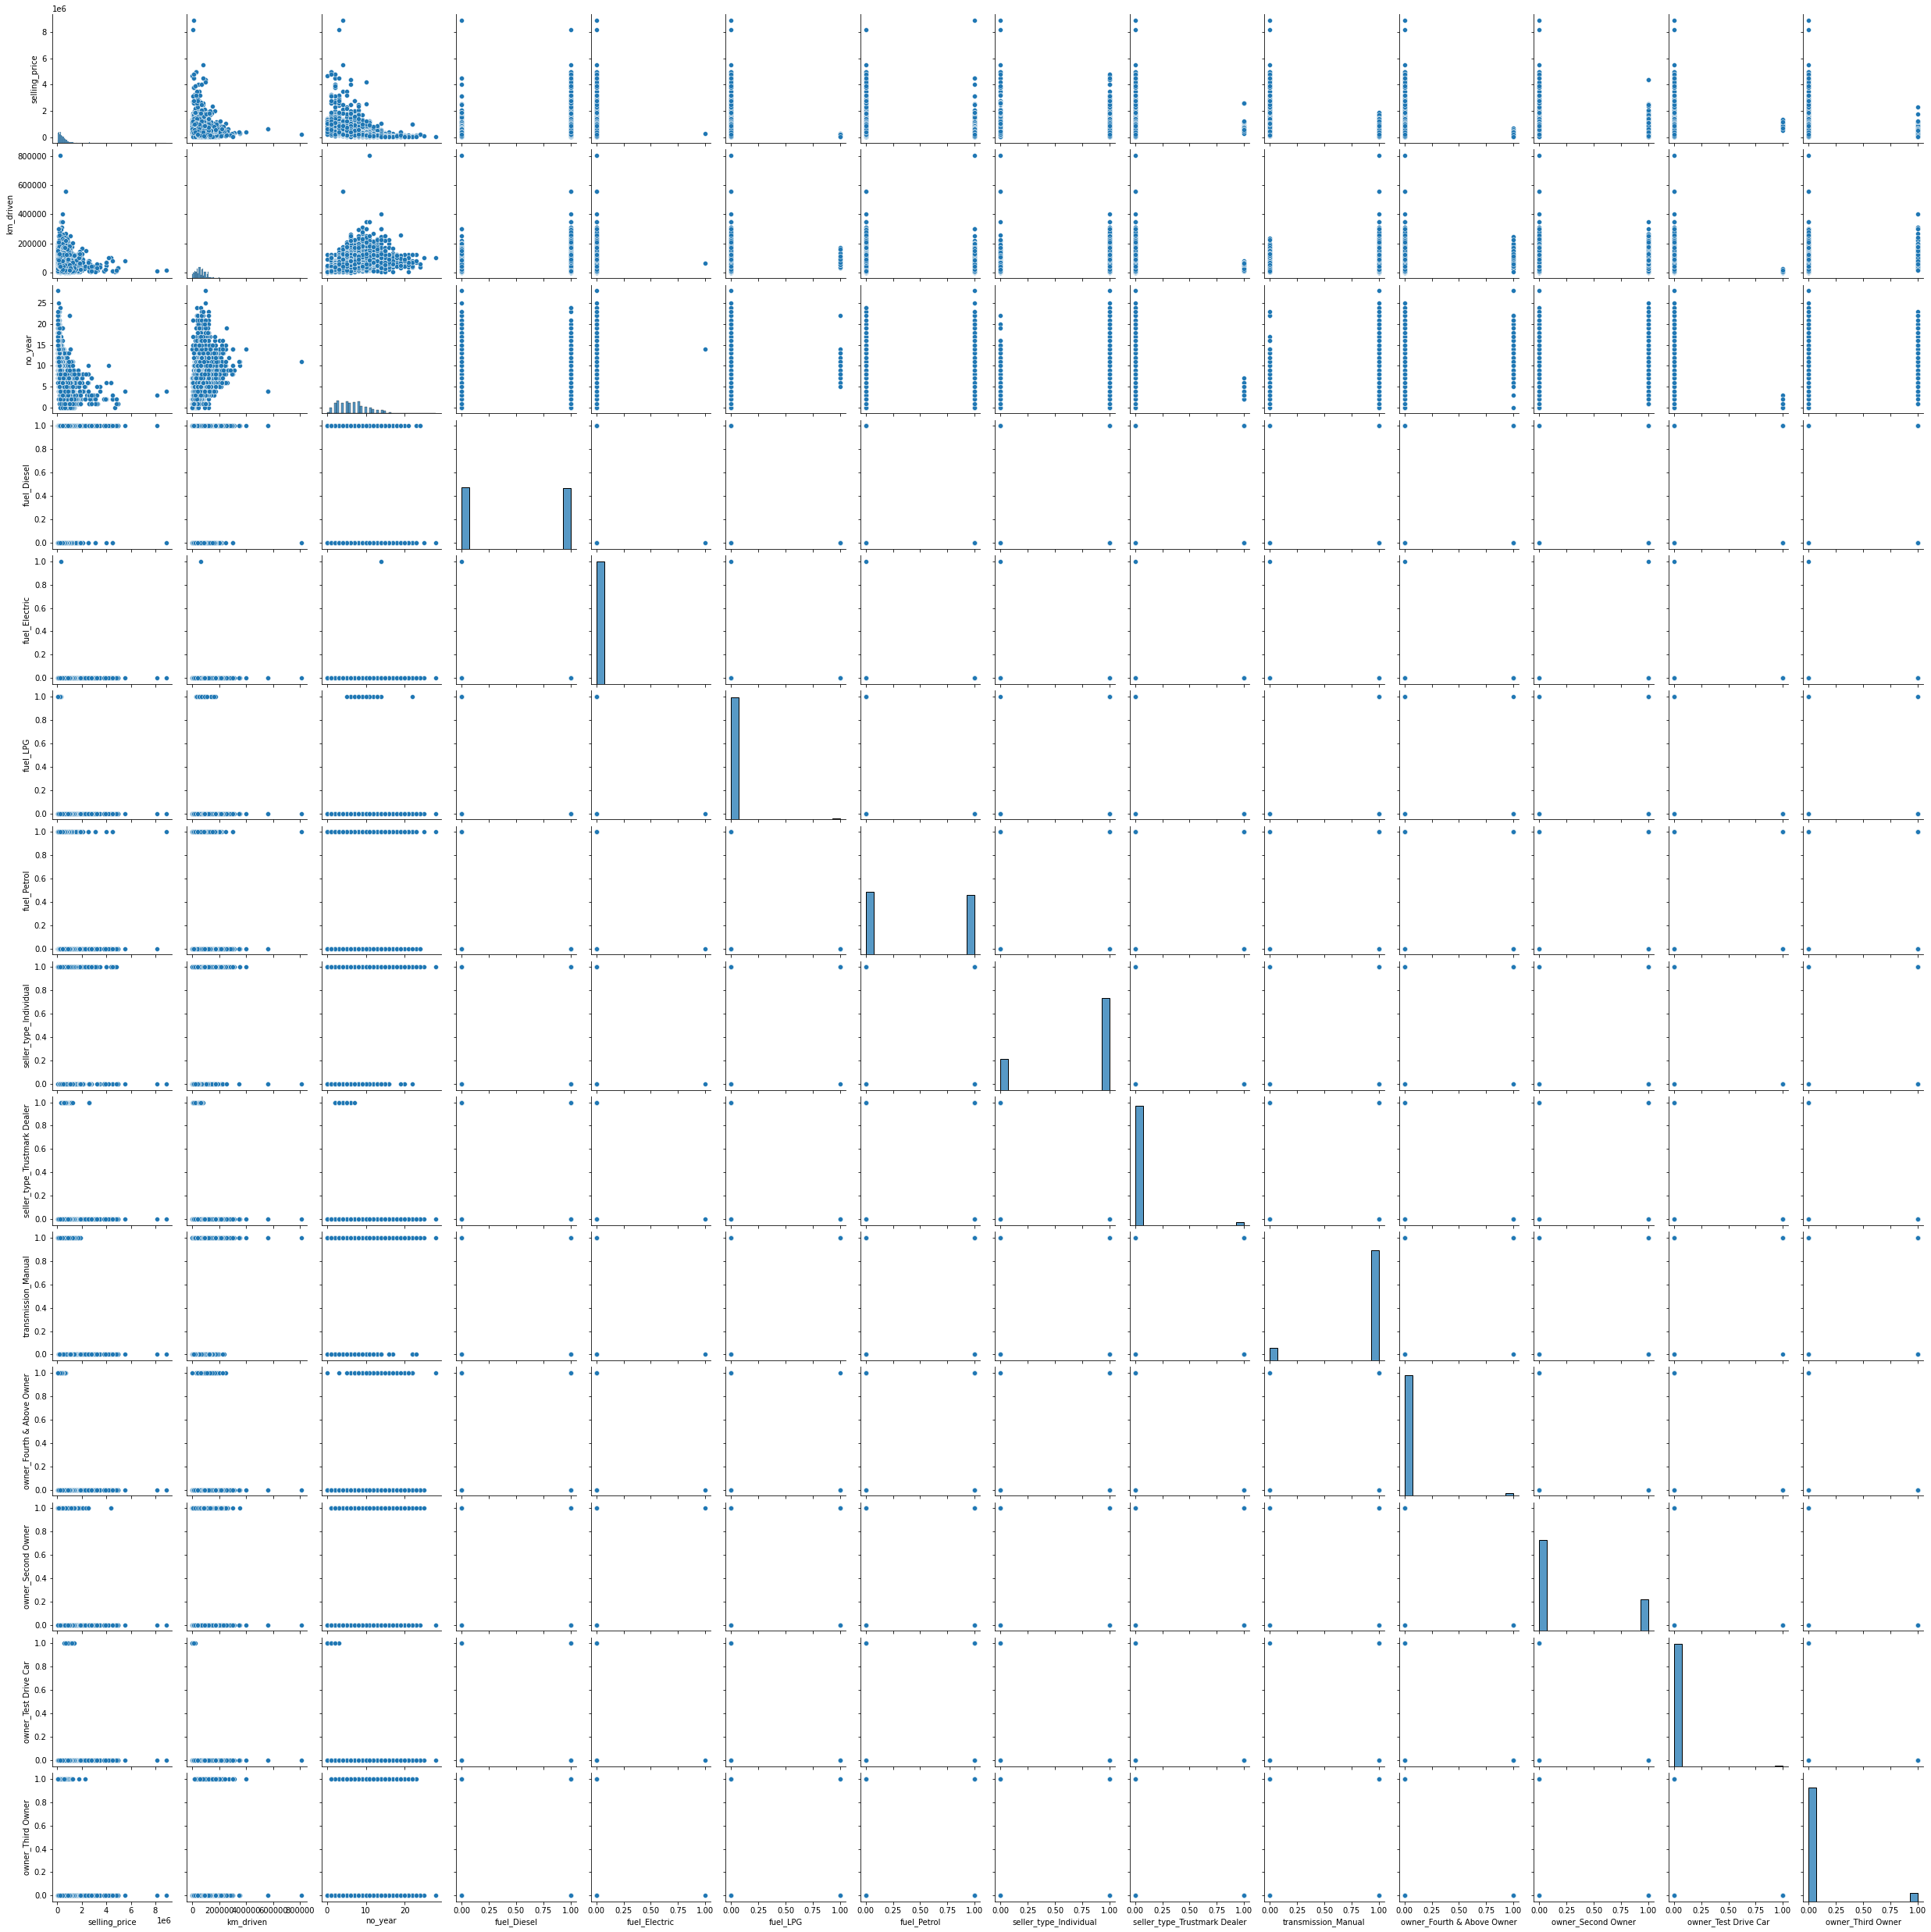

In [20]:
sns.pairplot(df)

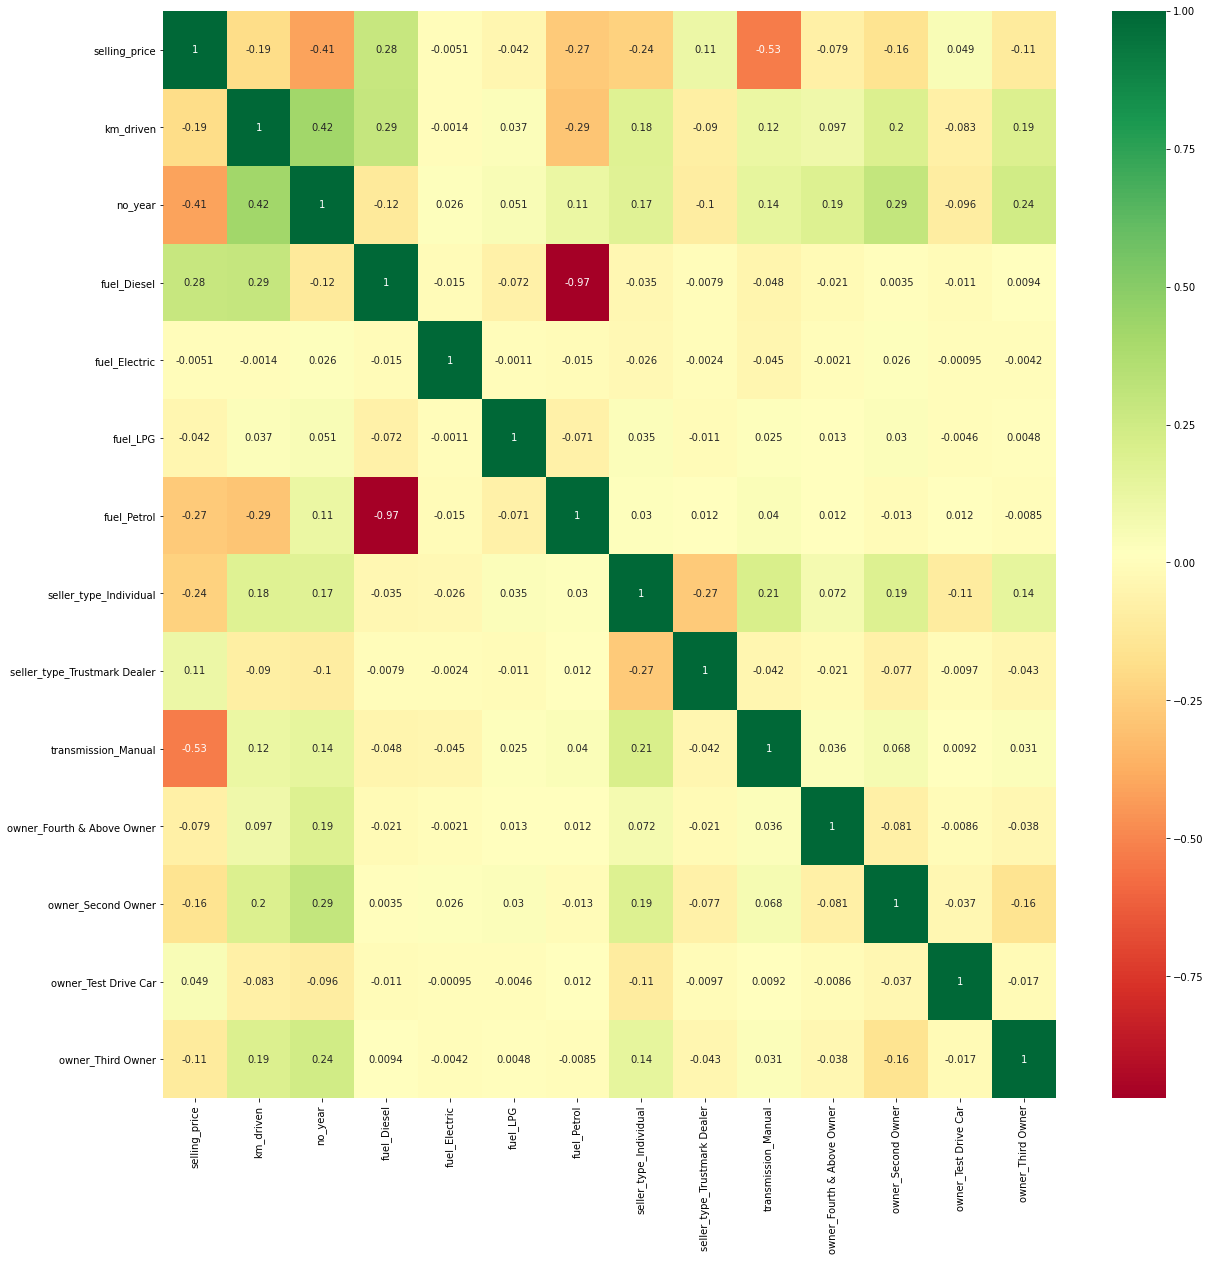

In [21]:
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
#dependent and independent features
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [23]:
x.head()

,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,13,0,0,0,1,1,0,1,0,0,0,0
1,50000,13,0,0,0,1,1,0,1,0,0,0,0
2,100000,8,1,0,0,0,1,0,1,0,0,0,0
3,46000,3,0,0,0,1,1,0,1,0,0,0,0
4,141000,6,1,0,0,0,1,0,1,0,1,0,0


In [24]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [25]:
# !pip install ensemble
# !pip install sklearn

In [26]:
#to find out which are the features are importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [27]:
model.feature_importances_

array([2.49083358e-01, 2.46141017e-01, 1.29712117e-01, 1.44295286e-05,
       2.61500619e-05, 2.21651664e-04, 4.48848215e-02, 8.44945233e-03,
       2.92828574e-01, 8.22661936e-04, 2.24928263e-02, 7.93983341e-04,
       4.52895817e-03])

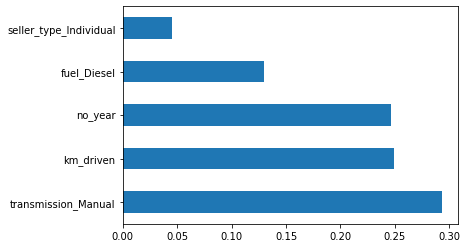

In [28]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=x.columns) 
feat_importances.nlargest(5).plot(kind='barh') 
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train.head()


,km_driven,no_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
227,20000,3,1,0,0,0,1,0,1,0,0,0,0
964,50000,2,1,0,0,0,1,0,1,0,0,0,0
2045,25000,7,0,0,0,1,1,0,1,0,1,0,0
1025,70000,9,1,0,0,0,1,0,1,0,0,0,0
4242,72000,3,1,0,0,0,0,0,1,0,0,0,0


In [31]:
y_train.head()

227     1500000
964      500000
2045      92800
1025      95000
4242     685000
Name: selling_price, dtype: int64

In [32]:
x_train.shape

(3472, 13)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [34]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
#Randomized Search CV

#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=200,num=12)]
#Number of feature to consider at every split
max_features=['auto','sqrt']
#maximum number of levels in trees
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(none)
#minimum number of sample required to split a node
min_samples_split=[2,5,10,15,100]
# minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [37]:
#Create random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 109, 118, 127, 136, 145, 154, 163, 172, 181, 190, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [38]:
#use the random grid to search for best parameters
#first create the base model to tune
rf=RandomForestRegressor()


In [39]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [40]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=190; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=190; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 109, 118, 127,
                                                         136, 145, 154, 163,
                                                         172, 181, 190, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
predictions=rf_random.predict(x_test)

In [42]:
predictions

array([ 197225.05818698,  513764.20998169,  142644.95555289,
        502943.27236827, 1746334.77425026,  198183.13101859,
        457533.10963313,  144971.70182578,  552780.0806224 ,
        261218.87332285,  559122.83805486,  516730.18474384,
        614436.67070619,  133878.41803034,  638223.63367049,
        540740.27163343,  899034.09587526, 1337636.02185216,
        157023.43628505, 1483884.82586291,  705956.24087696,
        949610.02958035,  458592.36163878,  983032.17706961,
        195210.4230373 ,  605164.09028157,  704844.40271924,
        310232.99841857,  333769.69114317,  441706.24790242,
        126293.89993565, 1115739.85832769,  487262.09997075,
        899968.89858857,  546029.07800394,  302483.39501538,
        993543.92745857,  460238.48467176,  180903.76210035,
        467115.17043768,  659498.05568711,  465596.5666919 ,
        749273.40391431,  266387.08630638,  210173.01013363,
        266923.50685965,  451618.78969147,  481036.18637383,
        734711.10136856,

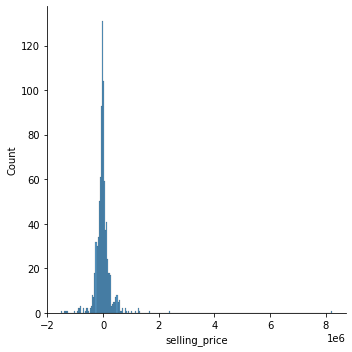

In [43]:
sns.displot(y_test-predictions)

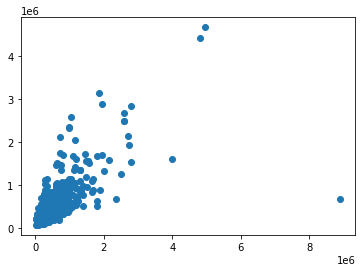

In [44]:
plt.scatter(y_test,predictions)

In [45]:
import pickle 
file=open('model.pkl','wb')
pickle.dump(rf_random,file)

In [46]:
#Evaluation
from sklearn.metrics import mean_absolute_error,r2_score
print("MAE:",mean_absolute_error(y_test,predictions))
r2_score(y_test,predictions)

MAE: 169827.20248353743


0.5011812147646144

In [47]:
import pickle
with open('car.pkl','wb') as f:
    pickle.dump(rf_random,f)

In [48]:
rf_random=pickle.load(open('car.pkl','rb'))

In [58]:
rf_random.predict([[20000,4,1,0,0,0,1,0,1,0,0,0,0]])[0]#845326.3240264695 


845326.3240264695

In [60]:
rf_random.predict([[20000,5,1,0,0,0,1,0,1,0,0,0,0]])[0]#845326.3240264695 


701061.4113968154